In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=4
os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=4 
os.environ["MKL_NUM_THREADS"] = "1" # export MKL_NUM_THREADS=6


In [2]:
import dask
import numpy as np
import dask.array as da
import lamade
from lamade.decomp.svd_init import *
import h5py
import matplotlib.pyplot as plt

In [3]:
array_file_path = '/Users/tnonet/Documents/SVD_Matricies/data/10K_40K.h5py'

assert os.path.isfile(array_file_path)
array_file_path = os.path.abspath(array_file_path)
f = h5py.File(array_file_path, 'r')
snp_array = dask.array.from_array(f['/array'])

In [4]:
snp_array

dask.array<array, shape=(10000, 40000), dtype=int8, chunksize=(3125, 40000), chunktype=numpy.ndarray>

In [22]:
x, log = eigengap_svd_start(snp_array, k=10, b_max=10, tol=1e-6, lift=0, log=1, warm_start_row_factor=5)

/Users/tnonet/Documents/GitHub/lamade/lamade/decomp/svd_init.py:172: RuntimeWarning: divide by zero encountered in log
  return np.log(x) / np.log(b)


In [48]:
da.linalg.norm(snp_array[0:4000,0:4000], 'nuc').compute()

100545.60033184342

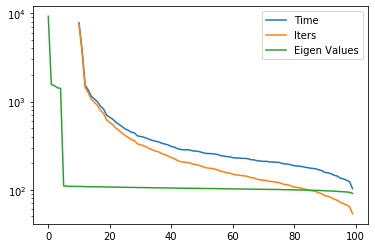

In [34]:
k = 10
plt.plot(log['costs'], label ='Time')
plt.plot(log['req_iter'], label='Iters')
plt.plot(log['S'], label='Eigen Values')
plt.yscale('log')
plt.legend()
plt.show()

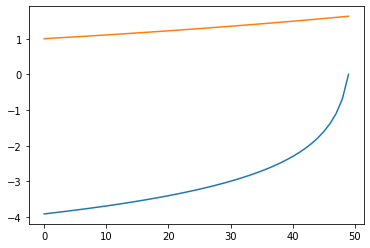

In [32]:
k = np.arange(0, 50)
plt.plot(-np.log(50 - k))
plt.plot(1.01**k)

In [7]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [8]:
diff = (np.array(time[11:]) - np.array(time[10:-1])) / np.array(time[11:])
plt.plot(diff[10:100])
plt.plot(-0.01*np.ones_like(diff[10:100]))
plt.plot(moving_average(diff, n = 10)[10:100])

NameError: name 'time' is not defined

In [ ]:
print(costs[11])
print(costs[20])
print(costs[40])

In [ ]:
U, S, V, log = svdecomp.decomp.SVD_m2(snp_array,
                                      k=10,
                                      over_sampling=1,
                                      tsqr_period_threshold=0,
                                      error_sample_period=0,
                                      max_iter=20)

print(log['end']-log['start'])

In [ ]:
U, S, V, log = svdecomp.decomp.SVD_m2(snp_array,
                                      k=10,
                                      over_sampling=10,
                                      tsqr_period_threshold=0,
                                      error_sample_period=0,
                                      max_iter=20)

print(log['end']-log['start'])

In [ ]:
U, S, V, log = svdecomp.decomp.SVD_m2(snp_array,
                                      k=10,
                                      over_sampling=30,
                                      tsqr_period_threshold=0,
                                      error_sample_period=0,
                                      max_iter=20)

print(log['end']-log['start'])

In [ ]:
U, S, V, log = svdecomp.decomp.SVD_m2(snp_array,
                                      k=10,
                                      over_sampling=60,
                                      tsqr_period_threshold=0,
                                      error_sample_period=0,
                                      max_iter=20)

print(log['end']-log['start'])

In [ ]:
U, S, V, log = svdecomp.decomp.SVD_m2(snp_array,
                                      k=10,
                                      over_sampling=100,
                                      tsqr_period_threshold=0,
                                      error_sample_period=0,
                                      max_iter=20)

print(log['end']-log['start'])

In [ ]:
a = []
b = 1

In [ ]:
if b: